In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

c:\Program Files\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_transforms = transforms.Compose([
    transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2,hue=0.2),
    transforms.RandomRotation((-5.0,5.0), fill=(1,)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.1307,),std=(0.3081,))
])

test_transforms = transforms.Compose([

    transforms.ToTensor(),
    transforms.Normalize(mean=(0.1307,),std=(0.3081,))

])

In [3]:
train= datasets.mnist.MNIST(root="./data",train=True,download=True,transform=train_transforms)
test = datasets.mnist.MNIST(root="./data",train=False,download=True,transform=test_transforms)

In [4]:
SEED = 42
cuda  = torch.cuda.is_available()

if cuda:
    torch.cuda.manual_seed(SEED)

dataloader_args = dict(shuffle=True,batch_size=128,num_workers=4,pin_memory=True) if cuda else dict(batch_Size=128,shuffle=True)

train_loader = torch.utils.data.DataLoader(train,**dataloader_args)
test_loader = torch.utils.data.DataLoader(test,**dataloader_args)

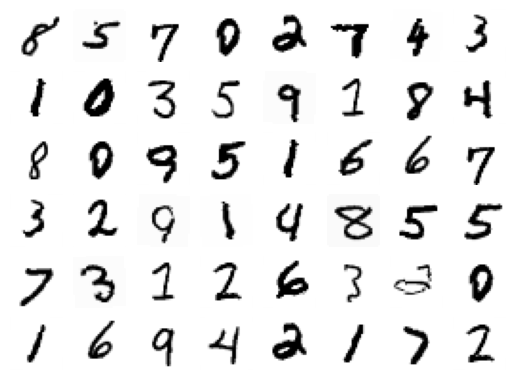

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots(6,8)

import random

batch_data = next(iter(train_loader))
n_rows = 6
n_cols = 8

plt.subplots_adjust(hspace=0)

for i in range(n_rows):
  for j in range(n_cols):
    num = random.randint(0,127)
    ax[i][j].imshow(batch_data[0][num].squeeze(),cmap="gray_r")
    ax[i][j].tick_params(left=False,bottom=False,labelleft=False, labelbottom=False)
    ax[i][j].axis("off")

In [6]:
# from S7.model_test import *
from modelv2_4 import ModelV2
from utils import *

In [7]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ModelV2().to(device)
summary(model, input_size=(1, 28, 28))

Defaulting to user installation because normal site-packages is not writeable
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]             100
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 12, 26, 26]           1,092
       BatchNorm2d-6           [-1, 12, 26, 26]              24
              ReLU-7           [-1, 12, 26, 26]               0
           Dropout-8           [-1, 12, 26, 26]               0
            Conv2d-9           [-1, 10, 26, 26]             130
      BatchNorm2d-10           [-1, 10, 26, 26]              20
             ReLU-11           [-1, 10, 26, 26]               0
          Dropout-12           [-1, 10, 26, 26]               0
        MaxPool2d-13

In [8]:
from torch.optim.lr_scheduler import StepLR

model =  ModelV2().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer,step_size=7,gamma=0.1)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader,optimizer, epoch)
    scheduler.step()
    test(model, device, test_loader,epoch)

EPOCH: 0


Loss = 0.12296298891305923,batch_idx = 468, accuracy = 83.50166666666667: 100%|██████████| 469/469 [00:15<00:00, 29.57it/s]



 Test set Avg Loss = 0.0954, Accuracy 9786/10000,(97.86%)

EPOCH: 1


Loss = 0.06970203667879105,batch_idx = 468, accuracy = 97.46: 100%|██████████| 469/469 [00:18<00:00, 25.58it/s]             



 Test set Avg Loss = 0.0513, Accuracy 9851/10000,(98.51%)

EPOCH: 2


Loss = 0.0721825435757637,batch_idx = 468, accuracy = 98.05166666666666: 100%|██████████| 469/469 [00:18<00:00, 24.73it/s]  



 Test set Avg Loss = 0.0629, Accuracy 9815/10000,(98.15%)

EPOCH: 3


Loss = 0.05016125738620758,batch_idx = 468, accuracy = 98.37: 100%|██████████| 469/469 [00:17<00:00, 26.11it/s]             



 Test set Avg Loss = 0.0334, Accuracy 9903/10000,(99.03%)

EPOCH: 4


Loss = 0.07430315017700195,batch_idx = 468, accuracy = 98.46666666666667: 100%|██████████| 469/469 [00:18<00:00, 25.28it/s] 



 Test set Avg Loss = 0.0419, Accuracy 9870/10000,(98.70%)

EPOCH: 5


Loss = 0.05703398212790489,batch_idx = 468, accuracy = 98.61333333333333: 100%|██████████| 469/469 [00:18<00:00, 25.97it/s] 



 Test set Avg Loss = 0.0266, Accuracy 9914/10000,(99.14%)

EPOCH: 6


Loss = 0.016623705625534058,batch_idx = 468, accuracy = 98.77166666666666: 100%|██████████| 469/469 [00:17<00:00, 26.85it/s]



 Test set Avg Loss = 0.0263, Accuracy 9910/10000,(99.10%)

EPOCH: 7


Loss = 0.05405707657337189,batch_idx = 468, accuracy = 98.96666666666667: 100%|██████████| 469/469 [00:16<00:00, 27.69it/s]  



 Test set Avg Loss = 0.0217, Accuracy 9932/10000,(99.32%)

EPOCH: 8


Loss = 0.006945196073502302,batch_idx = 468, accuracy = 98.97833333333334: 100%|██████████| 469/469 [00:16<00:00, 27.79it/s] 



 Test set Avg Loss = 0.0215, Accuracy 9932/10000,(99.32%)

EPOCH: 9


Loss = 0.032769396901130676,batch_idx = 468, accuracy = 99.00666666666666: 100%|██████████| 469/469 [00:16<00:00, 27.83it/s] 



 Test set Avg Loss = 0.0216, Accuracy 9928/10000,(99.28%)

EPOCH: 10


Loss = 0.029390973970294,batch_idx = 468, accuracy = 99.03833333333333: 100%|██████████| 469/469 [00:16<00:00, 28.01it/s]    



 Test set Avg Loss = 0.0213, Accuracy 9931/10000,(99.31%)

EPOCH: 11


Loss = 0.011091365478932858,batch_idx = 468, accuracy = 99.04333333333334: 100%|██████████| 469/469 [00:16<00:00, 27.92it/s] 



 Test set Avg Loss = 0.0205, Accuracy 9935/10000,(99.35%)

EPOCH: 12


Loss = 0.020023014396429062,batch_idx = 468, accuracy = 99.02666666666667: 100%|██████████| 469/469 [00:16<00:00, 28.16it/s] 



 Test set Avg Loss = 0.0213, Accuracy 9929/10000,(99.29%)

EPOCH: 13


Loss = 0.09424351900815964,batch_idx = 468, accuracy = 99.10166666666667: 100%|██████████| 469/469 [00:16<00:00, 27.67it/s]  



 Test set Avg Loss = 0.0202, Accuracy 9936/10000,(99.36%)

EPOCH: 14


Loss = 0.01899576373398304,batch_idx = 468, accuracy = 99.05: 100%|██████████| 469/469 [00:18<00:00, 25.68it/s]             



 Test set Avg Loss = 0.0208, Accuracy 9934/10000,(99.34%)



In [9]:
test_loss = list(test_losses.values())
train_loss = list(train_losses.values())
train_accuracy = list(train_acc.values())
test_accuracy = list(test_acc.values())

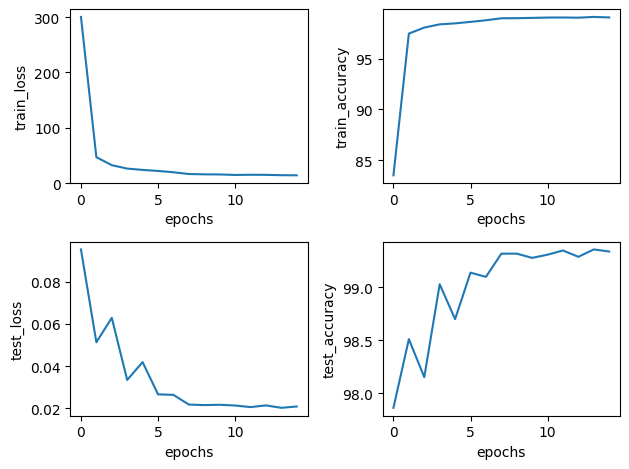

In [10]:
fig,ax = plt.subplots(2,2)
ax[0,0].plot(train_loss)
ax[0,1].plot(train_accuracy)
ax[1,0].plot(test_loss)
ax[1,1].plot(test_accuracy)

ax[0,0].set_xlabel("epochs")
ax[0,0].set_ylabel("train_loss")
ax[0,1].set_xlabel("epochs")
ax[0,1].set_ylabel("train_accuracy")

ax[1,0].set_xlabel("epochs")
ax[1,0].set_ylabel("test_loss")
ax[1,1].set_xlabel("epochs")
ax[1,1].set_ylabel("test_accuracy")
fig.tight_layout()